# Experiments for DeepEA

This notebook runs both the vanilla EA and the deep EA for comparison of convergence.

Please see the src folder for source code, there is also a poster under data.

In [1]:
# only run this if on colab
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Current_Activities/DeepEA')  # change this to your directory containing src

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from src.problems.tsp import TSP
from src.ea.optimizer import Optimizer, OptimizerMode
import json

DEVICE = 'cuda'
DEPTH = 10

In [3]:
import matplotlib.pyplot as plt

def plot_histories(h1, h2, save_name):
    # data
    x1 = h1['generation']
    y1 = h1['loss']
    x2 = h2['generation']
    y2 = h2['loss']
    
    # Plotting the two lines with different colors
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x1, y1, color='blue', label='VanillaEA')
    ax.plot(x2, y2, color='green', label='DeepEA')

    # Adding title and legend
    ax.set_title('Convergence Processes of VanillaEA and DeepEA')
    ax.legend()

    # Displaying the plot
    plt.show()
    fig.savefig(save_name, dpi=300)
    

## Trial 1 : 30-Nodes TSP, 10 depth

Setup: we are only only use verbose mode in trial 1 to better illustrate the optimization process.

In [4]:
tsp_p = TSP(cities=30)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=True)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=True)

Vanilla Optimization

In [5]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 30 cities, NORMAL distribution

Evolving
Current Generation: 10

Best Candidate:
Sequence: [ 1 24  8  0 27 26 12  9 23  4  3 21 20 13  6 11 25 18 17 16  2  5 10 28
  7 22 29 15 19 14]
Fitness(Loss): -23.5787
Crossover Probs: None
Mutation Rate: None

Loss: 23.578707339765096

Current Generation: 20

Best Candidate:
Sequence: [29 19 15 14  1 24  8  0 27 26 12  9 23  3  4 21 13 20  6 11 25 18 17 16
  2  5 10 28  7 22]
Fitness(Loss): -22.8846
Crossover Probs: None
Mutation Rate: None

Loss: 22.88464776193854

Current Generation: 30

Best Candidate:
Sequence: [29 19 15 14  1 24  8  0 27 26 12  9 23  3  4 21 13 20  6 11 25 18 17 16
  2  5 10 28  7 22]
Fitness(Loss): -22.8846
Crossover Probs: None
Mutation Rate: None

Loss: 22.88464776193854


Convergence reached:

Results written to /content/[13-04-2023-07:42:01]-history

Deep Optimization

In [6]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 30 cities, NORMAL distribution

Evolving

Training MLP GAN, Generation 3:

Epoch 2 loss: 0.19573673605918884
Epoch 4 loss: 7.197897502919659e-05
Epoch 6 loss: 7.239777187351137e-05
Training Complete.


Training MLP GAN, Generation 6:

Epoch 2 loss: 6.526720244437456e-05
Epoch 4 loss: 6.573555583599955e-05
Training Complete.


Training MLP GAN, Generation 9:

Epoch 2 loss: 7.539922080468386e-05
Epoch 4 loss: 7.18785886419937e-05
Training Complete.

Current Generation: 10

Best Candidate:
Sequence: [ 9 23 13 20  6 11 25 21 18  5 10 28 22 29 15 19 14  7  1 24  2 16 17  3
  4  8  0 27 26 12]
Fitness(Loss): -23.8956
Crossover Probs: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.56644358e-04
 0.00000000e

Plotting

In [7]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

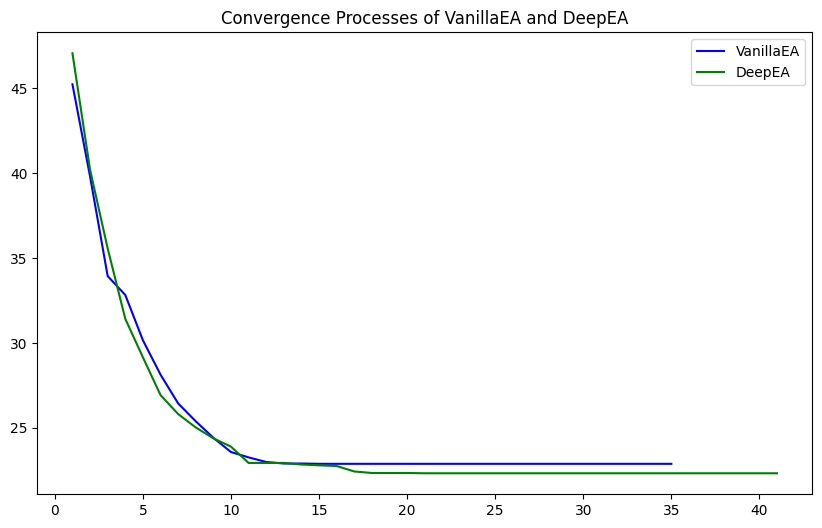

In [8]:
plot_histories(vanilla_history, deep_history, '30-cities.png')

## Trial 2 : 60-Nodes TSP, 10 depth

Setup:

In [9]:
tsp_p = TSP(cities=60)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [10]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 60 cities, NORMAL distribution

Evolving
.......................................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-07:48:36]-history.json.

Current Generation: 135

Best Candidate:
Sequence: [27  4  6 10  1 50 34 44 37 42 26 54 59 15 58 39 38  7  3 53 16 31 55 17
  9 57 32 48 46  0  8 13 51 19 45  2 21 29 30 36 14 28 56 18 11 22 20 49
 24 43 41  5 52 23 25 12 40 35 33 47]
Fitness(Loss): -26.5062
Crossover Probs: None
Mutation Rate: None

Loss: 26.50623512901484



Deep Optimization

In [11]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 60 cities, NORMAL distribution

Evolving
........................................................................
Convergence reached:

Results written to /content/[13-04-2023-07:53:36]-history.json.

Current Generation: 72

Best Candidate:
Sequence: [30 36 14 33 35 56 28 18 11 22 52  5 20 12 25 47  4  6 10  1 27 40 49 43
 41 24 23  7  3 39 15 58 38 53 16 31 37 59 54 26 42 44 34 50 55 17  0 46
 51 48 13  8  9 57 32 19 45  2 21 29]
Fitness(Loss): -25.9862
Crossover Probs: [0.0000000e+00 4.4853598e-05 0.0000000e+00 1.8084975e-05 2.7929267e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.5681094e-05
 2.9850489e-05 0.0000000e+00 0.0000000e+00 2.0238034e-05 0.0000000e+00
 1.5154727e-06 0.0000000e+00 0.0000000e+00 4.6320230e-05 2.0858170e-05
 4.8049635e-05 6.2171152e-05 1.9390359e-06 0.0000000e+00 7.4303447e-05


Plotting

In [12]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

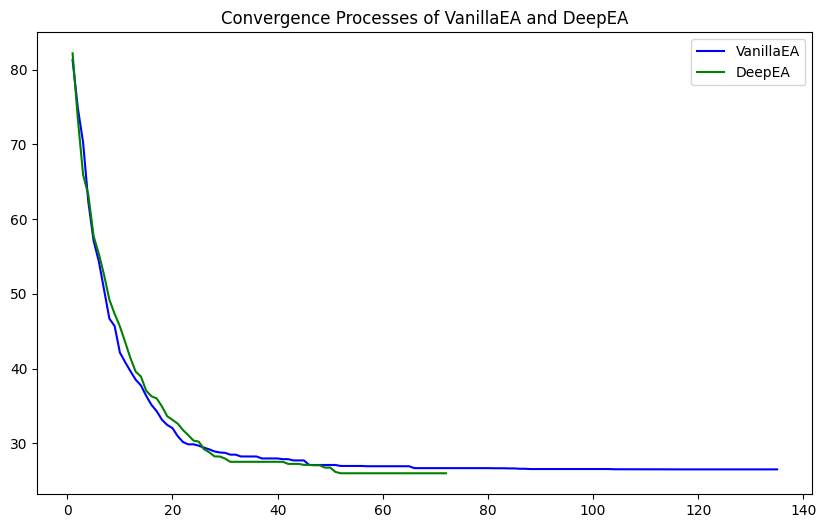

In [13]:
plot_histories(vanilla_history, deep_history, '60-cities.png')

## Trial 3 : 120-Nodes TSP, 10 depth

Setup:

In [14]:
tsp_p = TSP(cities=120)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [15]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 120 cities, NORMAL distribution

Evolving
..........................................................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-08:04:44]-history.json.

Current Generation: 154

Best Candidate:
Sequence: [ 78   8  83  94  66  28  60  49  61  80  48   9  20  75  35  42  11  25
   6  45  47 116  22  21  27  81  64  15  31 117  74  18  14 119  16   5
  44   2   7   4 114  91  76  65  99  90  87 112   0   3  62 118  56  43
 108 103  13  46  30  71  88  55  86 102  95  39  12  82  10  77 110  96
  92  38  79  29 105  63  70  50   1  58  54 104  40  23  68 101 106  73
  59  72  32  36 111  98  53  33  34  84  69  24  19  89 109 107  37 100
  93 113  97  41  51  52  57  85 115  17  67  26]
Fitn

Deep Optimization

In [16]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 120 cities, NORMAL distribution

Evolving
.................................................................................................................................................................................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-08:39:52]-history.json.

Current Generation: 272

Best Candidate:
Sequence: [ 78  26  52  57   6  93 113  51  41  97 108 103  13  71  46  88  15  64
  31  95 102  86  55  30 100  37 109  89  19  42  11  45  69  34  53  14
  92  38  68 106  73  96  29  79  82  12  39 117  32  16  44  98  84 116
  21  47  24   7   2   4 101  23  40  58   1 104  54  91 114  80  61  76
  49  60  28   9  20 115  17  67  85  35  75  48  33  36  22  81 107  25
  27   5 119

Plotting

In [17]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

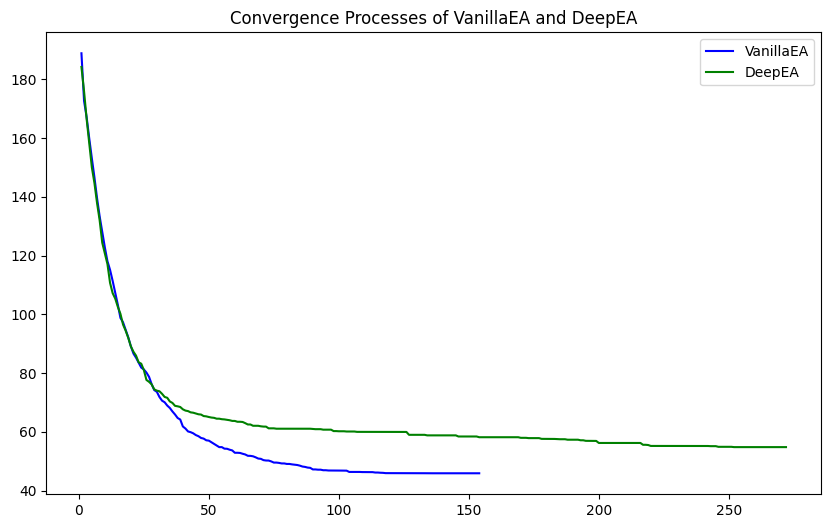

In [18]:
plot_histories(vanilla_history, deep_history, '120-cities.png')

## Trial 4 : 40-Nodes TSP, 16 depth

In [52]:
DEPTH = 16

Setup:

In [53]:
tsp_p = TSP(cities=40)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [54]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 40 cities, NORMAL distribution

Evolving
............................................
Convergence reached:

Results written to /content/[13-04-2023-09:37:37]-history.json.

Current Generation: 44

Best Candidate:
Sequence: [38  4  8 36 22 10 17 39 29 25 37 28  7 23 35 14 32 19 30 33  6  5 13  1
  3 16 21 11 31  9 34 26  0 20 18 27  2 12 24 15]
Fitness(Loss): -23.1254
Crossover Probs: None
Mutation Rate: None

Loss: 23.125372988389188



Deep Optimization

In [55]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 40 cities, NORMAL distribution

Evolving
...............................................
Convergence reached:

Results written to /content/[13-04-2023-09:40:02]-history.json.

Current Generation: 47

Best Candidate:
Sequence: [23  7  0 34  9 26 28 37 25 29 39 17 10  4  8 36 38 22 32 14 19 35 15 24
 12 33 30  6  5 13  1 21  3 16 11 31 18 27  2 20]
Fitness(Loss): -22.6664
Crossover Probs: [1.15447128e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.40406477e-05 0.00000000e+00 1.24919869e-04 0.00000000e+00
 0.00000000e+00 9.13781259e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.44512885e-05 1.55335481e-04 1.93605287e-04
 4.49191721e-05 0.00000000e+00 0.00000000e+00 7.98987094e-05
 0.00000000e+00 1.39936938e-05 5.62005916e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.44327161e-05
 0.00000000e+0

Plotting

In [56]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

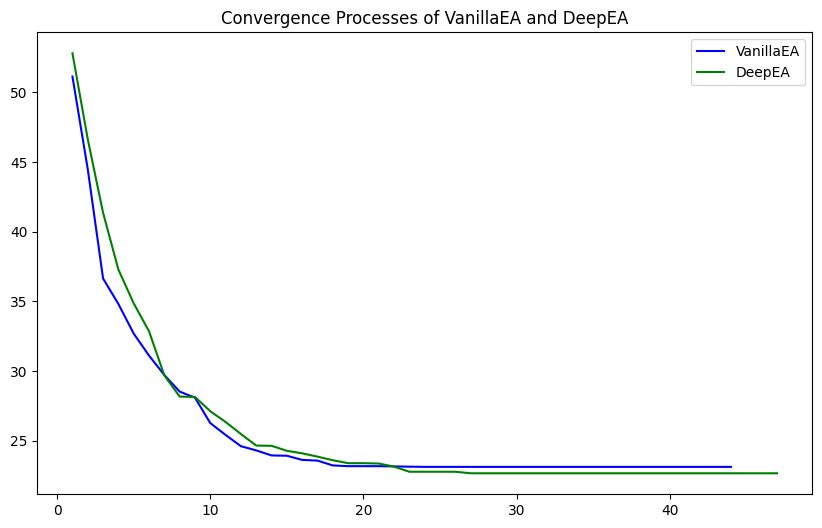

In [57]:
plot_histories(vanilla_history, deep_history, '40-cities.png')

## Trial 5 : 70-Nodes TSP, 16 depth

In [58]:
DEPTH = 16

Setup:

In [59]:
tsp_p = TSP(cities=70)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [60]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 70 cities, NORMAL distribution

Evolving
....................................................................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-09:46:38]-history.json.

Current Generation: 164

Best Candidate:
Sequence: [58 49 61 22 45 48 55 57 31 15 51 63 27 16 50 65 38 69 43 62 54 33 59  2
  8 41 29 18 13 30 26 28 39 23 66 64 10 12 17 67 47 36  0  1 32  7 60 44
 34 35 21 24  4 42 46 40  5 37 25  6  9 68 19 52 11  3 53 14 56 20]
Fitness(Loss): -35.3498
Crossover Probs: None
Mutation Rate: None

Loss: 35.349799806877



Deep Optimization

In [61]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 70 cities, NORMAL distribution

Evolving
......................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-09:55:36]-history.json.

Current Generation: 118

Best Candidate:
Sequence: [ 8 41  7 60 44 34 35 21 24  4 32  1  0 36 47 49 42 53 11  3 14 46  5 37
 22 55 57 31 68  9 25 45 48  6 19 52 40 56 20 58 61 17 67 10  2 39 64 23
 12 15 51 66 63 54 38 65 50 27 16 62 43 69 26 13 30 33 59 28 18 29]
Fitness(Loss): -38.2938
Crossover Probs: [2.81798366e-05 0.00000000e+00 1.92394655e-05 2.06933123e-06
 0.00000000e+00 1.20818131e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.03101445e-05
 3.03258003e-05 9.08312177e-06 0.00000000e+00 1.05382960e-05
 0.00000000e+00 4.29543907e-05 0.0

Plotting

In [62]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

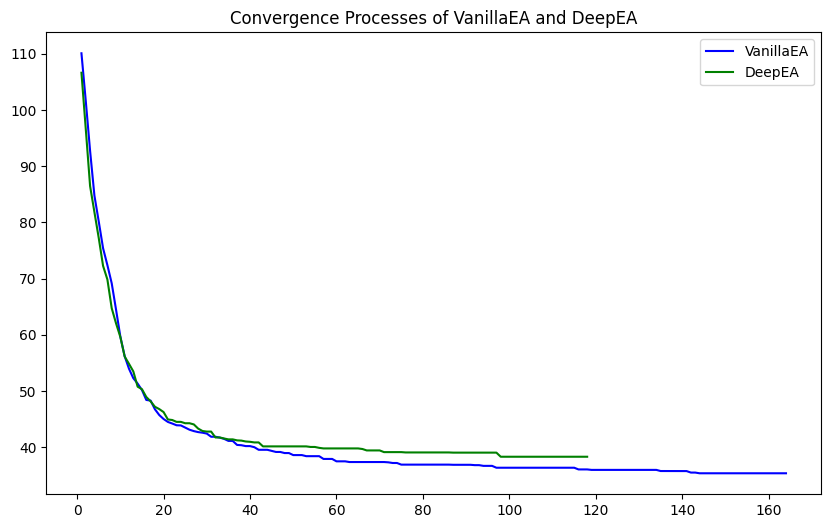

In [63]:
plot_histories(vanilla_history, deep_history, '70-cities.png')

## Trial 6 : 120-Nodes TSP, 16 depth

In [64]:
DEPTH = 16

Setup:

In [65]:
tsp_p = TSP(cities=120)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [66]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 120 cities, NORMAL distribution

Evolving
.........................................................................................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-10:08:43]-history.json.

Current Generation: 185

Best Candidate:
Sequence: [119  49  50  72  60  10 113  77  26  32  45  59  25 106  80  79 103  68
 111  64   1   6   0  90  15 101  37  19  81  39  12   5  58  14  99  69
  97  47  93  43  70  22 100  78  62  96  44  66 104  31  24  28   9  30
  82  54  51  87  29 118  40  13  98  46  23  67  42  34  84  38 112  91
  85 105  75  74  17  89  41  53  57   3  92   4  18  94 115  63  33  76
 110  73  16  20  21  71  52 107  11  83  95  36  86  35 109  65   8  55
   2  48 117 114  88 10

Deep Optimization

In [67]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 120 cities, NORMAL distribution

Evolving
......................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-10:23:55]-history.json.

Current Generation: 114

Best Candidate:
Sequence: [ 75  89  41  51  87  54  53  57  92  94  18   4 115  16  73 110  76  33
  63  20  21  71  52  90   0   6 103  79  80  68   1  64 111  19  22  81
  43  93  70  99  14  12  58   5  39 117  96  78 101  37  15  36  86  35
 109  95  65  83   8   2  55 107  11  48 104  44  66   9  28  30  24  31
  62 100  47  97  69 114   3  82  29 112  91  38  84  46  98  13 118  88
  40   7 108  56 102  61  77  45  25 106  59  26  32  10 113  60  72  50
  49 116  27 119  23  67  42  34  85  17  74 105]
Fitness(Loss): -39.4463
Crossover Probs: [1.

Plotting

In [68]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

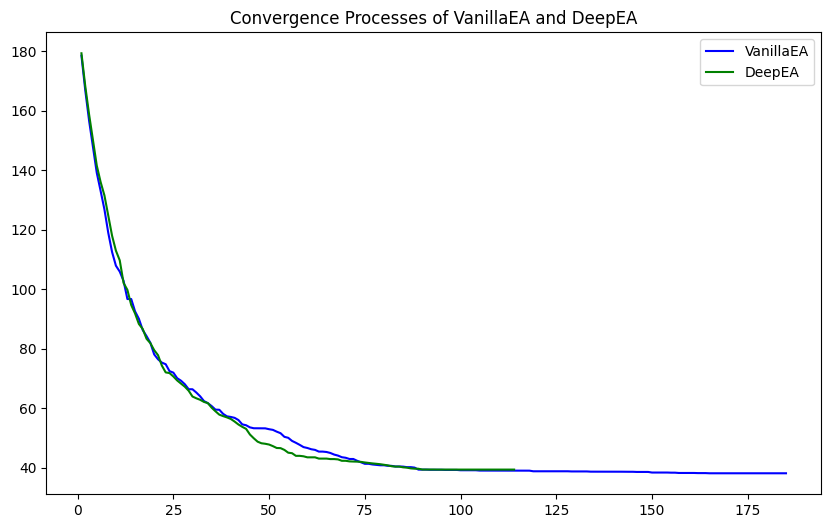

In [69]:
plot_histories(vanilla_history, deep_history, '120-cities-d16.png')

## Trial 7 : 120-Nodes TSP, 32 depth

In [70]:
DEPTH = 32

Setup:

In [71]:
tsp_p = TSP(cities=120)  # TSP problem
# optimizers
vanilla_optimizer = Optimizer(tsp_p, mode=OptimizerMode.VANILLA, device=DEVICE, verbose=False)
deep_optimizer = Optimizer(tsp_p, mode=OptimizerMode.MLP, depth=DEPTH, device=DEVICE, verbose=False)

Vanilla Optimization

In [72]:
vanilla_history = vanilla_optimizer.fit()

Initialized EA: 10000 population, 50 elites, VANILLA mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 120 cities, NORMAL distribution

Evolving
.............................................................................................................................................................................................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-10:44:22]-history.json.

Current Generation: 285

Best Candidate:
Sequence: [111  58  42  35  66  31   7  38  53  65 101  10  83 117  40  34  59  70
  63 109  78  72  96 102   8 107 100  14  45  15 119  74  87  55  22 108
  99  41  90  73  16  98  27  57  94  77  79  68  91  93  13  61  28   2
  54  84 106  89   5  60 110 114 115  92 116 105 103  21  20  39  30  26
  25   3  82  64  23  88   0   4  29  18  32  19  17  48  62  97  95 

Deep Optimization

In [73]:
deep_history = deep_optimizer.fit()

Initialized EA: 10000 population, 50 elites, MLP mode.
Stopping Condition: loss delta less than 1e-06 for 20 generations.

Problem Type: Travelling Salesman
Parameters: 120 cities, NORMAL distribution

Evolving
............................................................................................................................................
Convergence reached:

Results written to /content/[13-04-2023-11:03:16]-history.json.

Current Generation: 139

Best Candidate:
Sequence: [ 50  75  85  12  71  24  30  39   3   5  92 115   4 114  60 110  18  29
  62  19  35  53  46 113  86  43  37  95 104  44  42  58  52  32   0  97
  31   7  38  66  17  48  70  59  72  78  63 109  96   8  41  99  22  87
 108  47  76  55  74  15 119   6  81  27  98  79  68  93  28  61  13  91
  57  11  36  51 118  73  16  90 102 107 100  14  45  83 117  40   1  10
  34 101  65 111  67  88  82  25  26  23  64  89   2  54  84 116 106 105
  20 103 112  21  49  94  69  77   9  56  80  33]
Fitness(Loss): -51.514

Plotting

In [74]:
with open(vanilla_history, 'r') as f:
    vanilla_history = json.load(f)
with open(deep_history, 'r') as f:
    deep_history = json.load(f)

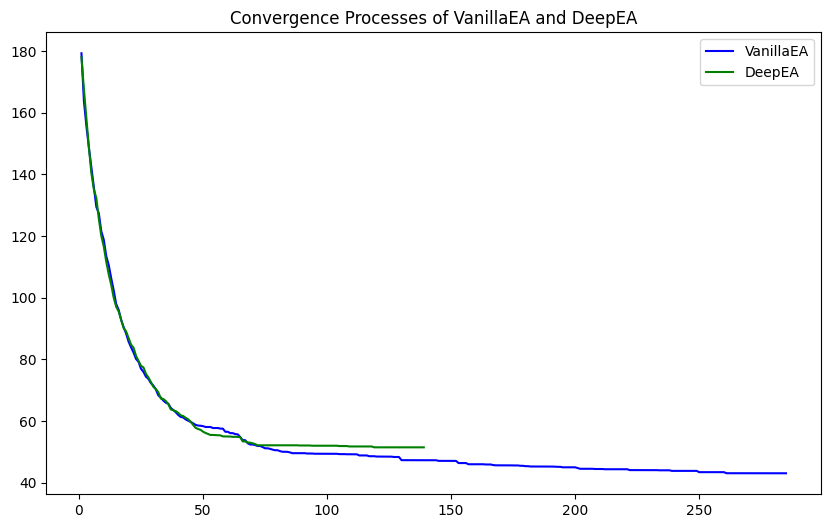

In [75]:
plot_histories(vanilla_history, deep_history, '120-cities-d32.png')